# CSL Daily Dataset Analysis

In [1]:
import os
import pickle
import pandas as pd
import numpy as np

from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud


In [2]:
os.chdir("/new_home/xzj23/workspace/SLR")
os.getcwd()

'/new_home/xzj23/workspace/SLR'

In [3]:
data_dir = "./data/csl-daily"
features_dir = os.path.join(data_dir, "sentence_frames-512x512/frames_512x512")
annotations_dir = os.path.join(data_dir, "sentence_label")

In [4]:
with open(os.path.join(annotations_dir, 'csl2020ct_v2.pkl'), 'rb') as f:
    data = pickle.load(f)
data.keys()

dict_keys(['info', 'gloss_map', 'char_map', 'word_map', 'postag_map'])

In [5]:
info = data['info']
gloss_map = data['gloss_map']
char_map = data['char_map']
word_map = data['word_map']
postag_map = data['postag_map']

In [6]:
info = pd.DataFrame(info)
info

,name,length,label_gloss,label_char,label_word,label_postag,signer,time
0,S000000_P0000_T00,52,"[你们, 好]","[你, 们, 好, ！]","[你们, 好, ！]","[r, a, w]",0,0
1,S000000_P0004_T00,47,"[你们, 好]","[你, 们, 好, ！]","[你们, 好, ！]","[r, a, w]",4,0
2,S000000_P0008_T00,58,"[你们, 好]","[你, 们, 好, ！]","[你们, 好, ！]","[r, a, w]",8,0
3,S000001_P0000_T00,37,[对不起],"[对, 不, 起, ！]","[对不起, ！]","[v, w]",0,0
4,S000001_P0004_T00,33,[对不起],"[对, 不, 起, ！]","[对不起, ！]","[v, w]",4,0
...,...,...,...,...,...,...,...,...
20649,S007410_P0003_T00,65,"[阑尾, 炎, 是, 经常, 看, 病]","[阑, 尾, 炎, 是, 一, 种, 很, 常, 见, 的, 疾, 病, 。]","[阑尾炎, 是, 一, 种, 很, 常见, 的, 疾病, 。]","[n, v, m, q, d, a, u, n, w]",3,0
20650,S007410_P0007_T00,157,"[阑尾, 炎, 是, 经常, 看, 病]","[阑, 尾, 炎, 是, 一, 种, 很, 常, 见, 的, 疾, 病, 。]","[阑尾炎, 是, 一, 种, 很, 常见, 的, 疾病, 。]","[n, v, m, q, d, a, u, n, w]",7,0
20651,S007411_P0000_T00,120,"[阑尾, 炎, 经常, 诱惑, 别, 什么, 病]","[阑, 尾, 炎, 经, 常, 引, 发, 其, 他, 疾, 病, 。]","[阑尾炎, 经常, 引发, 其他, 疾病, 。]","[n, d, v, r, n, w]",0,0
20652,S007411_P0003_T00,81,"[阑尾, 炎, 经常, 诱惑, 别, 什么, 病]","[阑, 尾, 炎, 经, 常, 引, 发, 其, 他, 疾, 病, 。]","[阑尾炎, 经常, 引发, 其他, 疾病, 。]","[n, d, v, r, n, w]",3,0


In [7]:
print(gloss_map)

['0', '1', '11', '12', '15', '18', '2', '20', '24', '3', '30', '32', '4', '45', '5', '50', '500', '6', '7', '70', '75', '8', '9', '98', 'APP', 'P', 'PPT', '爱', '癌', '爱-1', '爱好', '爱护', '爱情', '艾滋', '按', '安', '暗', '按键', '安静', '安排', '安全', '安全套', '安慰', '按照', '安装', '奥运', '阿姨', 'b', '把', '爸爸', '八宝粥', '白', '百', '白内障', '白天', '班', '办', '半', '搬', '版', '办公室', '榜样', '帮助', '班级', '办理', '斑马', '斑马线', '班长', '包', '饱', '抱', '薄', '报', '宝宝', '包庇', '保持', '报复', '报告', '宝贵', '保护', '包括', '保密', '报名', '保险', '保养', '抱怨', '爆炸', '保证', '报纸', '包装', '把握', '北', '被', '卑', '辈', '背后', '北京', '贝壳', '杯子', '被子', '本', '笨', '奔驰', '绷带', '本领', '比', '笔', '逼', '变', '边', '变化', '表', '表白', '表格', '表面', '表情', '表示', '表现', '表扬', '标志', '标准', '别', '别人', '比较', '笔记本', '避免', '病', '兵', '病毒', '病历', '宾馆', '冰箱', '比如', '比赛', '必须', '毕业', '避孕', '闭嘴', '伯伯', '播放', '玻璃', '博物', '不', '部', '步', '布', '不懂', '部分', '不够', '不管', '不好', '不好吃', '不会', '不见', '不久', '不理', '部门', '不能', '不如', '不是', '补贴', '不同', '不同意', '不想', '不相信', '不喜欢', '不行', '不幸', '不用', '不在', '不知道', '擦', '菜

In [8]:
print(char_map)

['%', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'D', 'M', 'N', 'P', 'T', '啊', '阿', '爱', '癌', '艾', '唉', '哎', '埃', '碍', '哀', '安', '按', '案', '暗', '昂', '傲', '熬', '奥', '爸', '吧', '把', '叭', '霸', '罢', '八', '跋', '巴', '拔', '白', '败', '百', '拜', '掰', '摆', '班', '般', '半', '办', '板', '斑', '伴', '扮', '颁', '搬', '瓣', '版', '帮', '榜', '绑', '棒', '傍', '邦', '报', '包', '饱', '保', '抱', '宝', '爆', '暴', '胞', '堡', '杯', '北', '备', '被', '辈', '背', '碑', '卑', '悲', '倍', '贝', '本', '奔', '笨', '崩', '绷', '泵', '迸', '笔', '比', '必', '闭', '彼', '毕', '痹', '逼', '弊', '避', '壁', '币', '毙', '庇', '边', '便', '变', '遍', '辩', '辨', '编', '表', '标', '别', '瘪', '宾', '濒', '缤', '滨', '病', '冰', '并', '兵', '饼', '播', '搏', '勃', '卜', '波', '玻', '博', '拨', '伯', '不', '步', '补', '部', '怖', '布', '捕', '擦', '菜', '才', '采', '财', '材', '彩', '猜', '裁', '睬', '餐', '参', '惨', '惭', '残', '舱', '苍', '仓', '藏', '草', '操', '糙', '测', '策', '册', '侧', '厕', '曾', '层', '茶', '查', '察', '差', '插', '姹', '拆', '缠', '产', '谄', '馋', '蝉', '禅', '场', '常', '偿', '唱', '厂', '娼', '倡', '尝', '畅', '敞',

In [9]:
print(word_map)

['1', '10', '100', '100年', '12月', '15', '16', '18', '1日', '2', '20', '20%', '24', '250', '2D', '3', '300', '3600', '3D', '4000', '45', '5', '5%', '50', '500', '520', '6', '7', '70', '70%', '700', '7天', '8', '9', 'ATM机', 'B超', 'N遍', 'PPT', 'P图', '啊', '爱', '唉', '癌', '哎', '癌变', '哀悼', '埃菲尔铁塔', '爱国', '爱好', '爱好者', '爱护', '爱美', '爱情', '爱人', '爱上', '爱睡', '癌痛', '哎呀', '碍眼', '癌症', '艾滋病', '艾滋病人', '按', '安安静静', '安定', '昂贵', '暗光', '安检', '安静', '按劳分配', '安宁', '安排', '按期', '安全', '安全套', '安全性', '安然', '按日', '按时', '安慰', '安慰人', '按下', '安详', '安心', '按照', '安置', '暗中', '安装', '安装费', '傲慢', '奥妙', '熬夜', '奥运', '阿姨', '吧', '把', '八', '爸爸', '八宝', '八宝粥', '八宝粥五', '八点', '拔掉', '罢工', '百', '摆', '白', '百倍', '百吃不厌', '掰断', '白发', '拜访', '摆放', '百分之二', '百分之九十八', '百分之九十九', '百分之七十', '百分之一', '百货', '白卷', '白里透红', '白内障', '白求恩', '白色', '白实线', '白天', '摆脱', '百姓', '白血病', '白云', '百折不挠', '罢了', '巴黎', '爸妈', '罢免', '半', '班', '办', '般', '搬', '斑白', '颁布', '班次', '搬到', '般地', '半点', '办法', '帮', '绑', '棒', '帮帮', '帮忙', '办公室', '傍晚', '榜样', '帮助', '班会', '班级', '搬家', '办理', '半路',

In [10]:
print(postag_map)

['r', 'a', 'w', 'v', 'l', 'd', 'n', 'nr', 'u', 'y', 'c', 'm', 'q', 't', 'ns', 'p', 's', 'f', 'vn', 'i', 'ad', 'z', 'an', 'b', 'vd', 'j', 'k', 'nz', 'h', 'nt', 'vx', 'e']


In [11]:
split = pd.read_csv(os.path.join(annotations_dir, 'split_1.txt'), sep='|', header=0)
split

,name,split
0,S000000_P0000_T00,train
1,S000000_P0004_T00,train
2,S000000_P0008_T00,train
3,S000001_P0000_T00,train
4,S000001_P0004_T00,train
...,...,...
20649,S007390_P0003_T00,test
20650,S007396_P0000_T00,test
20651,S007396_P0003_T00,test
20652,S007397_P0000_T00,test


In [12]:
train_list = split[split['split'] == 'train'].name.tolist()
dev_list = split[split['split'] == 'dev'].name.tolist()
test_list = split[split['split'] == 'test'].name.tolist()

# dataset have not S000005_P0004_T00, but S00007_P0003_T00
train_list.remove('S000005_P0004_T00')
train_list.append('S000007_P0003_T00')

In [13]:
train_info = info[info['name'].isin(train_list)]
dev_info = info[info['name'].isin(dev_list)]
test_info = info[info['name'].isin(test_list)]

assert len(train_info) + len(dev_info) + len(test_info) == len(info)

{'Train Set Size': 18401, 'Dev Set Size': 1077, 'Test Set Size': 1176, 'All Set Size': 20654}


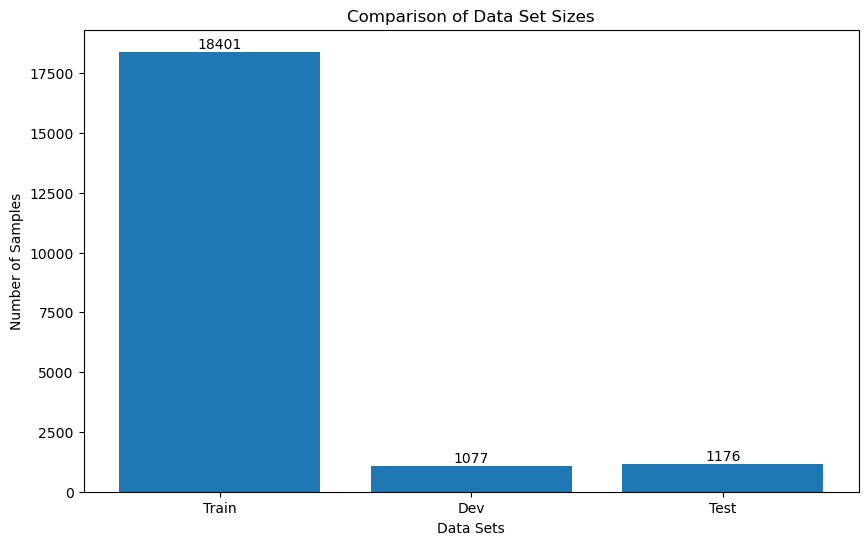

In [14]:
print({"Train Set Size": train_info.__len__(), "Dev Set Size": dev_info.__len__(),
       "Test Set Size": test_info.__len__(), "All Set Size": info.__len__()})
# 设置绘图参数
plt.figure(figsize=(10, 6))

# 绘制直方图
labels = ['Train', 'Dev', 'Test']
sizes = [train_info.__len__(), dev_info.__len__(), test_info.__len__()]

# 创建直方图
plt.bar(labels, sizes)

# 添加标题和标签
plt.title('Comparison of Data Set Sizes')
plt.xlabel('Data Sets')
plt.ylabel('Number of Samples')

# 显示数值
for i, v in enumerate(sizes):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# 显示图形
plt.show()

## Gloss Analysis

In [15]:
def plot_word_frequencies(word_counts, title):
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']  # 中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    words, counts = zip(*word_counts.most_common(20))
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    # 显示数值
    for i, v in enumerate(counts):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')
    plt.show()

In [16]:
def generate_word_cloud(word_counts, title):
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']  # 中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    wordcloud = WordCloud(font_path='wqy-microhei.ttc', width=800, height=400,
                          background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [17]:
gloss_counts = Counter(sum(info.label_gloss.tolist(), []))
gloss_counts

Counter({'我': 5766,
         '他': 3650,
         '你': 3047,
         '这': 2853,
         '人': 2646,
         '不': 1999,
         '多': 1983,
         '是': 1588,
         '有': 1588,
         '要': 1563,
         '好': 1527,
         '1': 1508,
         '我们': 1361,
         '没有': 1309,
         '看': 1258,
         '去': 1211,
         '想': 1163,
         '房子': 1135,
         '什么': 1123,
         '自己': 1057,
         '不行': 1042,
         '可以': 1030,
         '吃': 1010,
         '工作': 1003,
         '今天': 944,
         '说': 884,
         '时间': 841,
         '做': 746,
         '钱': 739,
         '会': 695,
         '小': 682,
         '买': 680,
         '在': 666,
         '全部': 665,
         '到': 655,
         '老师': 619,
         '妈妈': 612,
         '对': 571,
         '喜欢': 553,
         '爸爸': 532,
         '事情': 515,
         '给': 498,
         '好了': 483,
         '学': 480,
         '2': 480,
         '年': 452,
         '还': 436,
         '但是': 425,
         '病': 417,
         '快': 416,
        

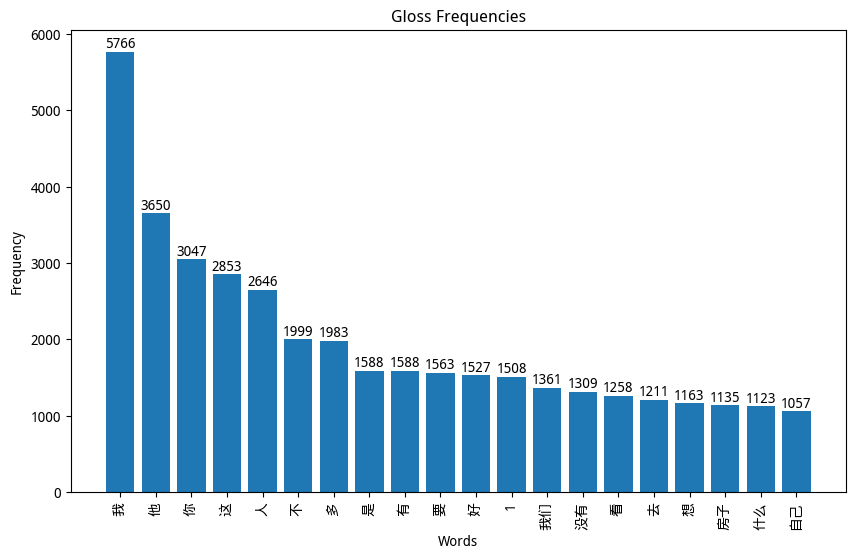

In [18]:
plot_word_frequencies(gloss_counts, 'Gloss Frequencies')

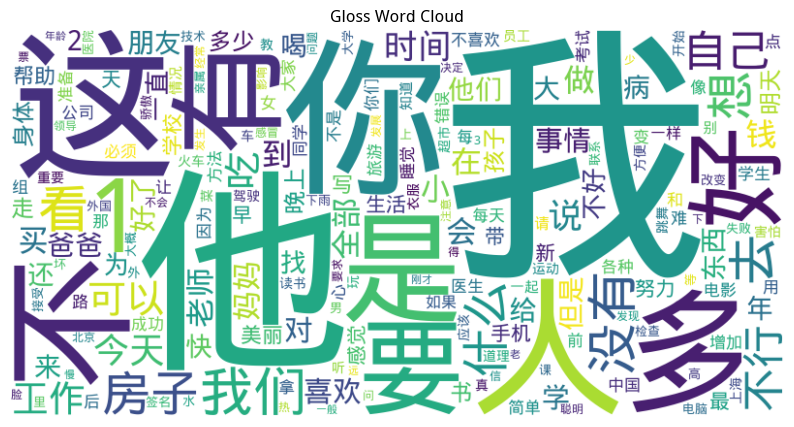

In [19]:
generate_word_cloud(gloss_counts, 'Gloss Word Cloud')

## Word Analysis

In [20]:
word_counts = Counter(sum(info.label_word.tolist(), []))
word_counts

Counter({'。': 18798,
         '，': 11563,
         '的': 10806,
         '我': 5710,
         '了': 5033,
         '他': 3627,
         '你': 2910,
         '不': 2871,
         '是': 2548,
         '在': 1973,
         '？': 1733,
         '很': 1614,
         '我们': 1607,
         '有': 1440,
         '人': 1384,
         '一': 1372,
         '去': 1345,
         '要': 1298,
         '都': 1201,
         '这': 1006,
         '会': 924,
         '和': 911,
         '能': 880,
         '就': 866,
         '想': 784,
         '没有': 751,
         '上': 733,
         '好': 711,
         '自己': 699,
         '对': 676,
         '什么': 659,
         '也': 650,
         '吃': 631,
         '可以': 608,
         '一个': 606,
         '喜欢': 603,
         '工作': 596,
         '老师': 579,
         '买': 568,
         '到': 557,
         '看': 541,
         '多': 540,
         '这个': 517,
         '做': 494,
         '让': 467,
         '不要': 467,
         '个': 462,
         '给': 457,
         '很多': 447,
         '把': 434,
         '今天': 

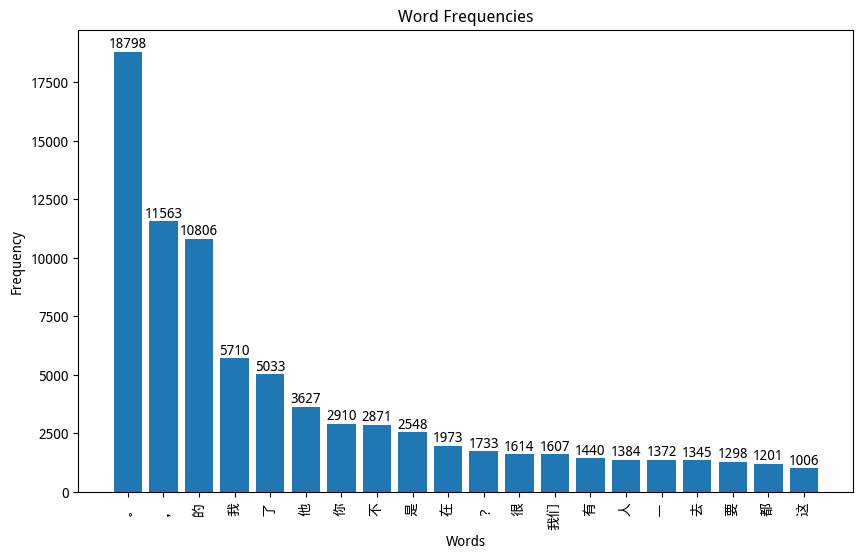

In [21]:
plot_word_frequencies(word_counts, 'Word Frequencies')

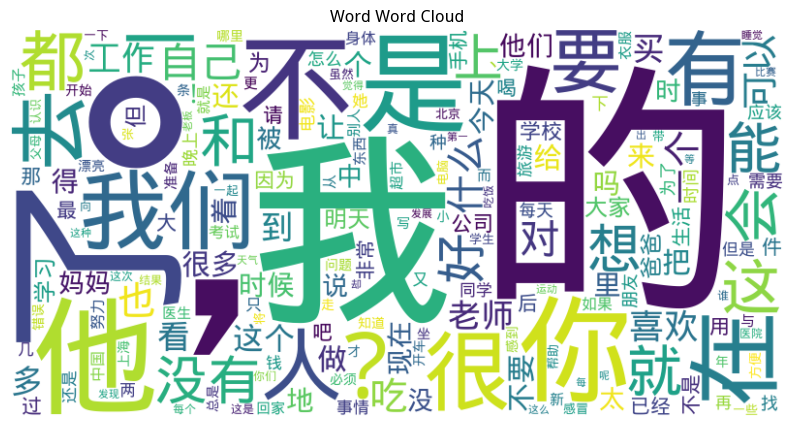

In [22]:
generate_word_cloud(word_counts, 'Word Word Cloud')

## Pos Tag Analysis

In [23]:
def plot_postag_distribution(postag_counts):
    """
    绘制不同 POS 标签的数量分布直方图，并按数量排序。
    
    参数:
    postag_counts (Counter): 包含每个 POS 标签数量的 Counter 对象。
    """
    # 将 Counter 转换为列表并排序
    sorted_postag_counts = sorted(postag_counts.items(), key=lambda x: x[1], reverse=True)

    # 提取标签和数量
    labels, values = zip(*sorted_postag_counts)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')

    # 添加标题和标签
    plt.title('Distribution of Postags')
    plt.xlabel('Postag')
    plt.ylabel('Count')

    # 显示数值
    for i, v in enumerate(values):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')

    # 显示图形
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
postag_counts = Counter(sum(info.label_postag.tolist(), []))
postag_counts

Counter({'v': 47800,
         'n': 37243,
         'w': 32974,
         'r': 21956,
         'd': 17210,
         'u': 15091,
         'a': 8599,
         'p': 5871,
         'm': 4522,
         'c': 3804,
         'vn': 3783,
         'y': 3339,
         'q': 3241,
         't': 3010,
         'f': 2239,
         'i': 1207,
         'ad': 924,
         'ns': 866,
         's': 675,
         'l': 524,
         'b': 523,
         'nr': 406,
         'an': 363,
         'z': 241,
         'vx': 152,
         'j': 149,
         'nz': 100,
         'k': 90,
         'vd': 87,
         'nt': 19,
         'h': 10,
         'e': 3})

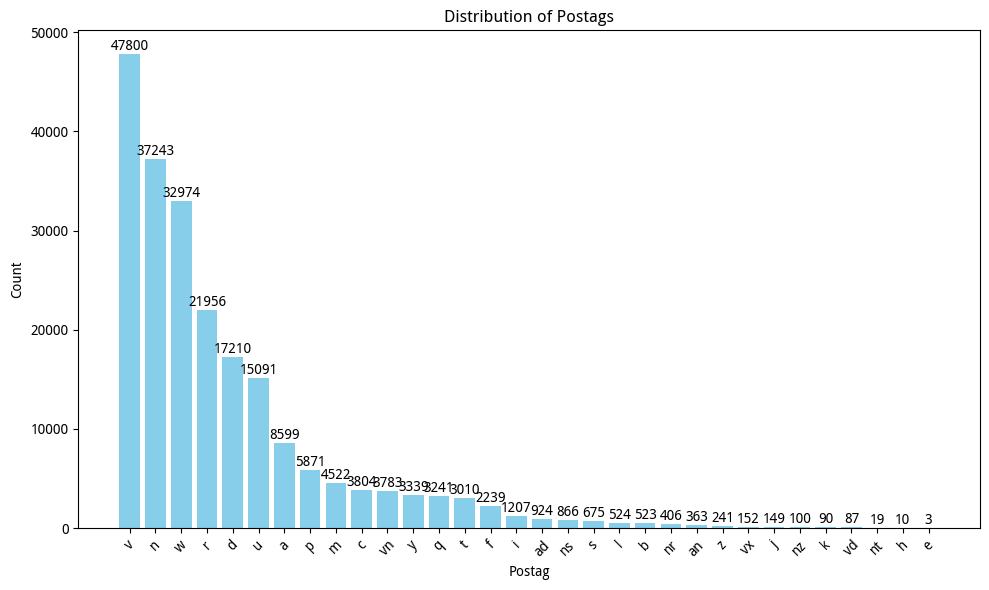

In [25]:
plot_postag_distribution(postag_counts)

## Signer Analysis

In [26]:
def plot_signer_distribution(signer_counts):
    """
    绘制不同 signer 的数量分布直方图，并按数量排序。
    
    参数:
    signer_counts (Counter): 包含每个 signer 数量的 Counter 对象。
    """
    # 将 Counter 转换为列表并排序
    sorted_signer_counts = sorted(signer_counts.items(), key=lambda x: x[1], reverse=True)

    # 提取标签和数量
    labels, values = zip(*sorted_signer_counts)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')

    # 添加标题和标签
    plt.title('Distribution of Signers')
    plt.xlabel('Signers')
    plt.ylabel('Count')

    # 显示数值
    for i, v in enumerate(values):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')

    # 显示图形
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [27]:
signer_counts = Counter([f"Signer {i}" for i in info.signer])
signer_counts

Counter({'Signer 0': 7391,
         'Signer 8': 1978,
         'Signer 3': 1712,
         'Signer 9': 1680,
         'Signer 4': 1648,
         'Signer 7': 1608,
         'Signer 2': 1551,
         'Signer 6': 1322,
         'Signer 5': 993,
         'Signer 1': 771})

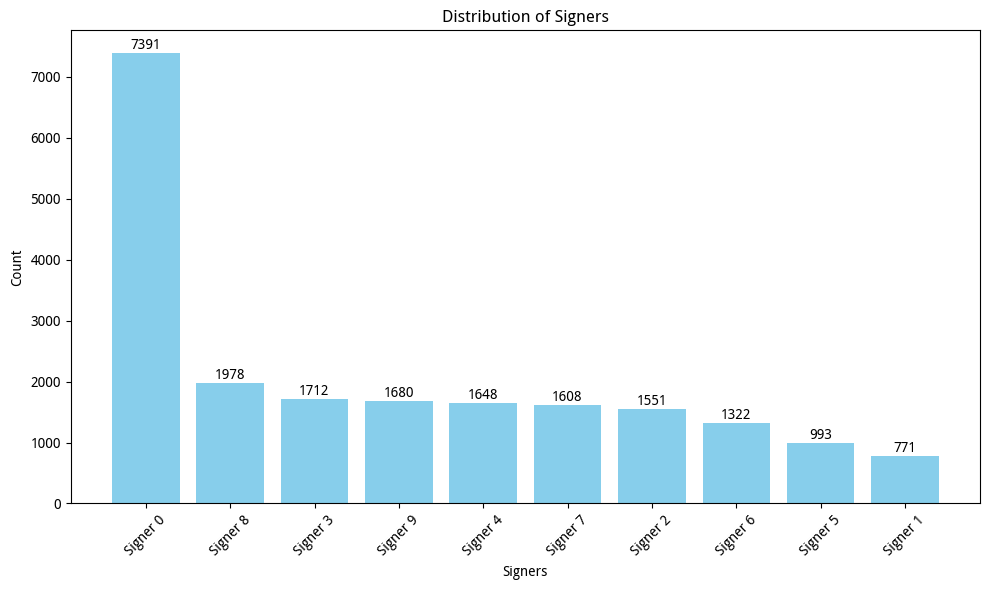

In [28]:
plot_signer_distribution(signer_counts)

## Length Analysis

In [29]:
def plot_frames_length_distribution(length_list):
    plt.figure(figsize=(10, 6))
    plt.hist(length_list, bins=50, alpha=0.5, label='Frames Length')
    plt.legend(loc='upper right')
    plt.title('Distribution of Frames Length and Orth Length and Translation Length')
    plt.xlabel('Length')
    plt.ylabel('Count')
    plt.show()
    print(
        f"Frames Length:\n"
        f"\tmean_std: {np.mean(length_list):.2f} +/- {np.std(length_list):.2f}\n"
        f"\tmin_max: {np.min(length_list)} ~ {np.max(length_list)}\n"
        f"\t5%_percentile: {np.percentile(length_list, 5)} ~ {np.percentile(length_list, 95)}"
    )

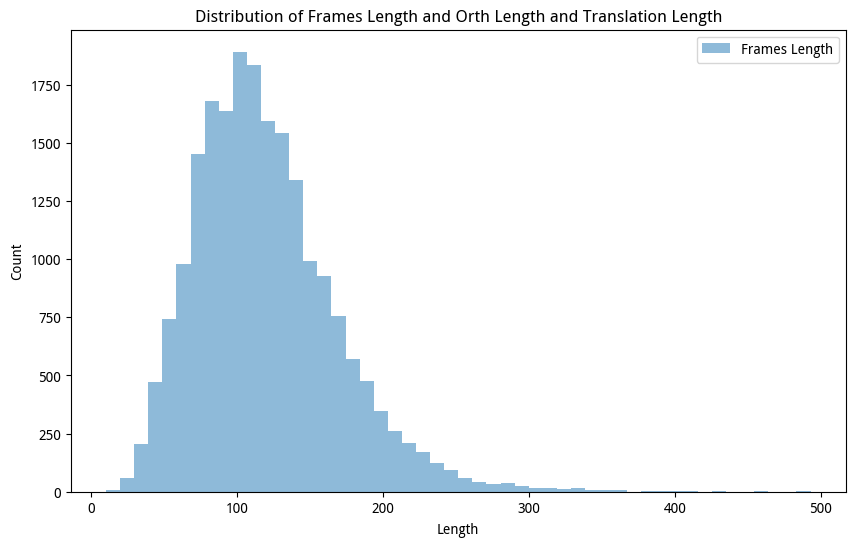

Frames Length:
	mean_std: 119.47 +/- 48.64
	min_max: 10 ~ 493
	5%_percentile: 53.0 ~ 207.0


In [30]:
plot_frames_length_distribution(info.length)